In [1]:
import numpy as np
import pandas as pd
import sympy as sp
sp.init_printing(use_latex=True)
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

### 1
一阶微分方程符号解

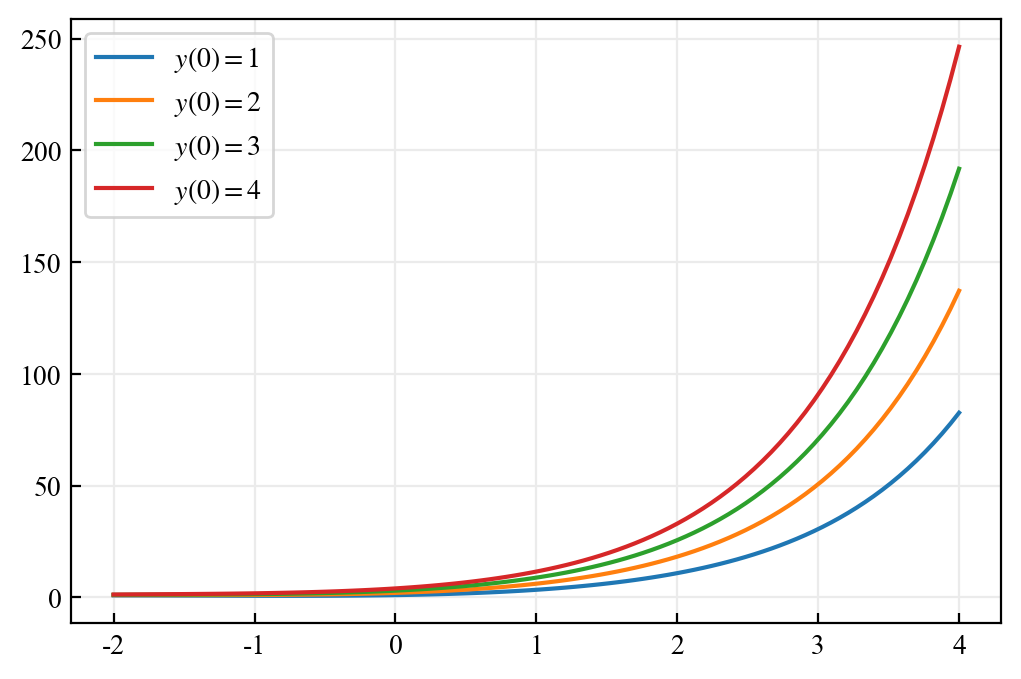

In [2]:
x = sp.symbols('x', real=True)
y = sp.Function('y')
eq = sp.Eq(y(x).diff(x) - y(x), sp.sin(x))

xx = np.linspace(-2, 4, 100)
yy = []
for i in range(1, 5):
    ss = sp.dsolve(eq, y(x), ics={y(0):i})
    yx = sp.lambdify(x, ss.args[1],'numpy')
    yy.append(yx(xx))

yy = np.array(yy)
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(yy)):
    ax.plot(xx, yy[i], label=f'$y(0)={i+1}$')
ax.legend(fontsize=10)
ax.grid(color='0.92')
fig.show()

### 2
二阶微分方程数值解

非原点初值，设置自变量序列时需要注意从 $\pi/2$ 开始

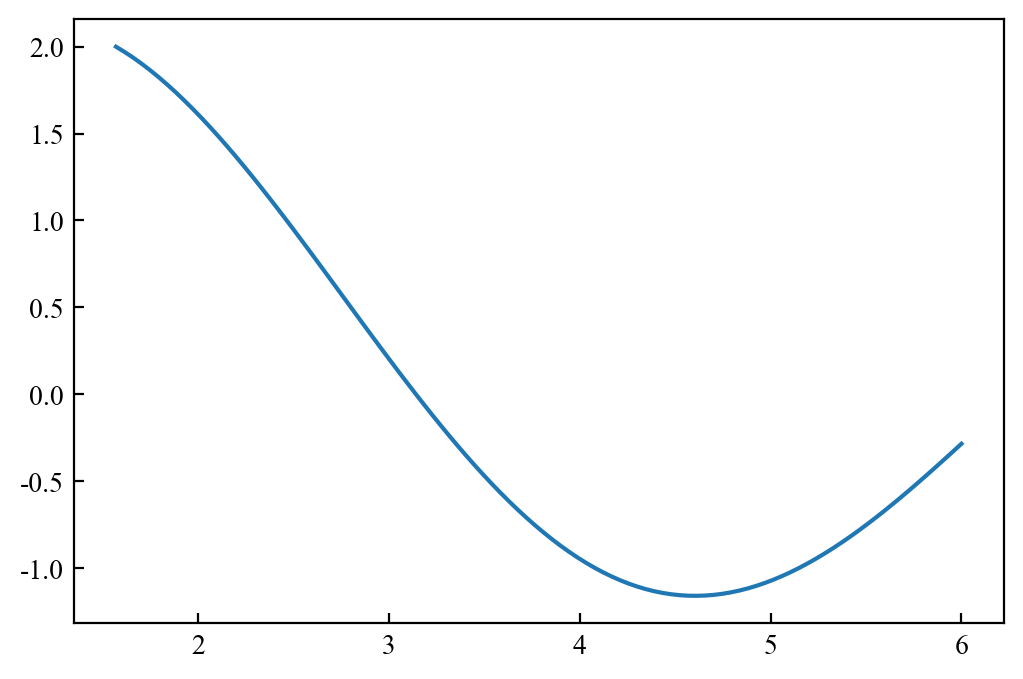

In [3]:
def rhs(f, x):
    y1, y2 = f
    n = 1/2
    return [
        y2,
        -1/x*y2 + ((n/x)**2-1)*y1,
    ]

xx = np.linspace(np.pi/2, 6, 100)
ns = odeint(rhs, [2, -2/np.pi], xx)
yy = ns[:,0]

plt.plot(xx, yy)
plt.show()

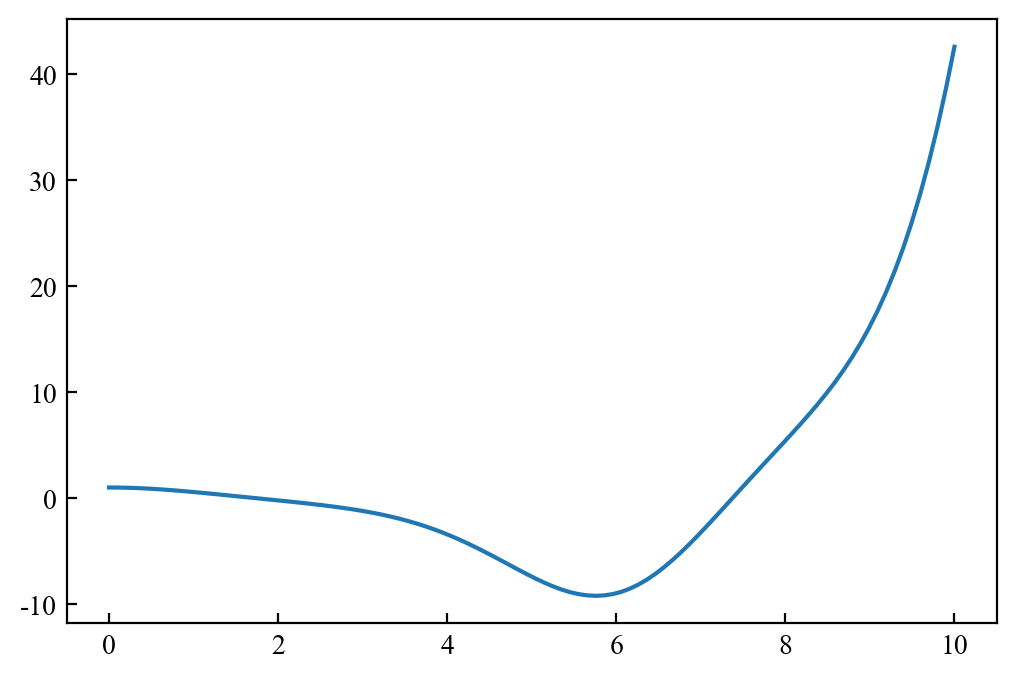

In [4]:
def rhs(f, x):
    y1, y2 = f
    return [
        y2, 
        -y1*np.cos(x),
    ]

xx = np.linspace(0, 10, 100)
ns = odeint(rhs, [1, 0], xx)
yy = ns[:,0]
plt.plot(xx, yy)
plt.show()

### 3
求微分方程组的符号解

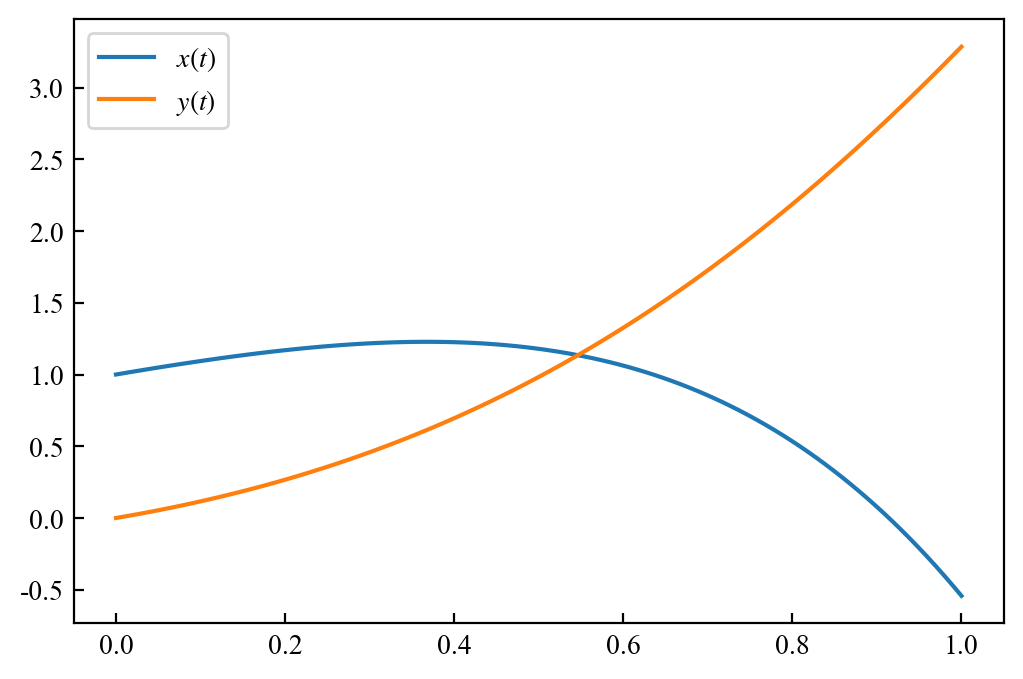

In [5]:
t = sp.symbols('t', real=True)
x, y = sp.var('x y', cls=sp.Function)
X = sp.Matrix([x(t), y(t)])
A = sp.Matrix([[1, -2], [1, 2]])
eq = X.diff(t) - A @ X
ss = sp.dsolve(eq, ics={x(0):1, y(0):0})
xt = sp.lambdify(t, ss[0].rhs, 'numpy')
yt = sp.lambdify(t, ss[1].rhs, 'numpy')

tt = np.linspace(0, 1, 100)
xx = xt(tt)
yy = yt(tt)
plt.plot(tt, xx, label='$x(t)$')
plt.plot(tt, yy, label='$y(t)$')
plt.legend()
plt.show()

### 4 
求微分方程组的数值解，在相平面上画出轨线

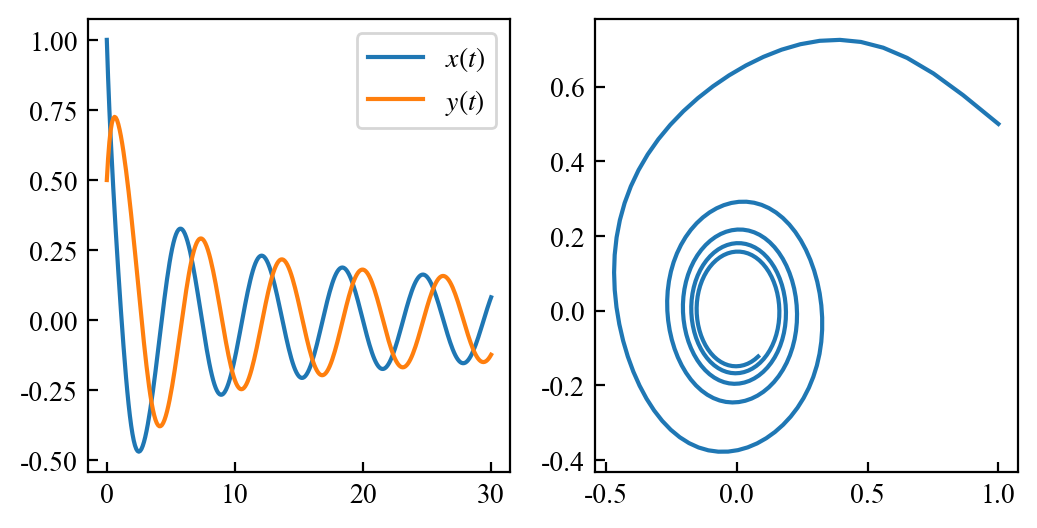

In [6]:
def rhs(f, t):
    x, y = f
    return [
        -x**3 - y,
        x - y**3,
    ]
tt = np.linspace(0, 30, 301)
ns = odeint(rhs, [1, 0.5], tt)
xx, yy = ns[:,0], ns[:,1]

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(121)
ax.plot(tt, xx, label='$x(t)$')
ax.plot(tt, yy, label='$y(t)$')
ax.legend()

ax1 = fig.add_subplot(122)
ax1.plot(xx, yy)

fig.show()

### 5
求 $(3, 2)$ 阶微分方程组的数值解

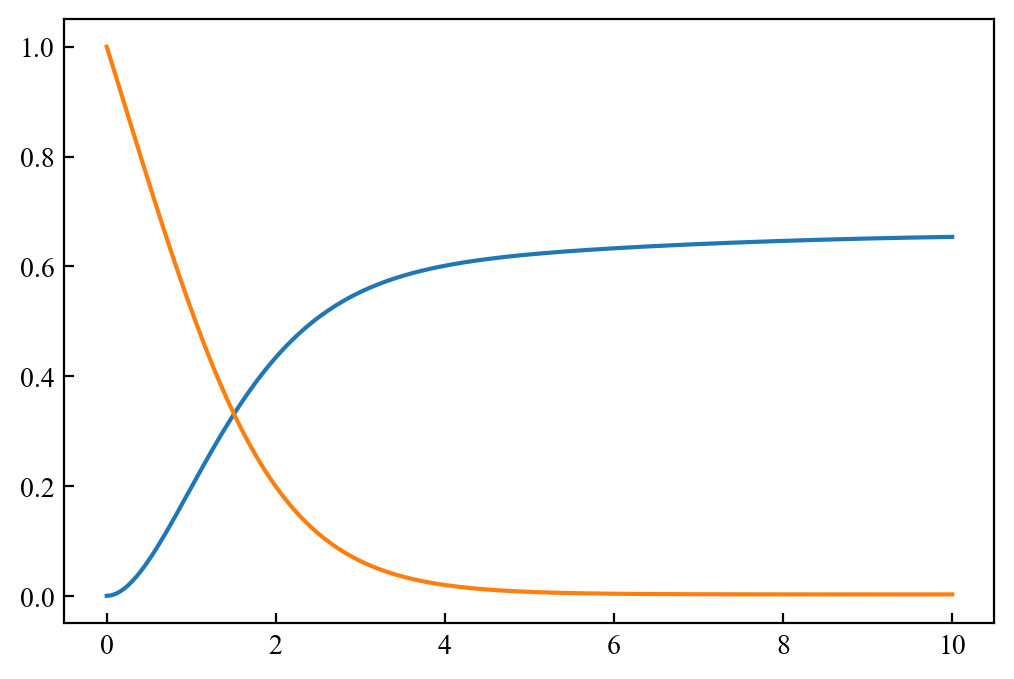

In [7]:
def rhs(f, t):
    f, f1, f2, T, T1 = f
    return [
        f1,
        f2, 
        -3*f*f2 + 2*f1**2 - T,
        T1,
        -2.1*f*T1,
    ]

f0 = np.array([0, 0, 0.68, 1, -0.5])
nn = np.linspace(0, 10, 200)
ns = odeint(rhs, f0, nn)
ff, TT = ns[:,0], ns[:,3]
plt.plot(nn, ff)
plt.plot(nn, TT)
plt.show()

### 6
解不出来，开摆

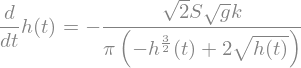

In [8]:
t, g, S, k = sp.symbols('t, g, S, k', nonneg=True)  # k=0.62 流量系数
h = sp.Function('h')
eq = sp.Eq(h(t).diff(t), (k*S*sp.sqrt(2*g))/(-sp.pi*(2*h(t)**sp.Rational(1, 2)-h(t)**sp.Rational(3, 2))))
eq

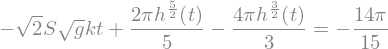

In [9]:
sp.dsolve(eq, ics={h(0):1})

### 7
单摆

In [10]:
# 8.71
def rhs(f, t, u):   # u = [l, g]
    y, y1 = f
    l, g = u
    return [
        y1,
        -g/l*np.sin(y)
    ]
 
l, g = 1, 9.8
tt = np.linspace(0, 30, 301)
thetas = odeint(rhs, [15/np.pi, 0], tt, args=([l, g],))[:,0]

# 8.72
def rhs(f, t, u):   # u = [l, g, m, lambda]
    y, y1 = f
    l, g, m, _lambda = u
    return [
        y1,
        -g/l*np.sin(y) - _lambda/m*y1,
    ]
 
l, g, m, _lambda = 1, 9.8, 1, 0.1
tt = np.linspace(0, 30, 301)
thetas_with_resistance = odeint(rhs, [15/np.pi, 0], tt, args=([l, g, m, _lambda],))[:,0]

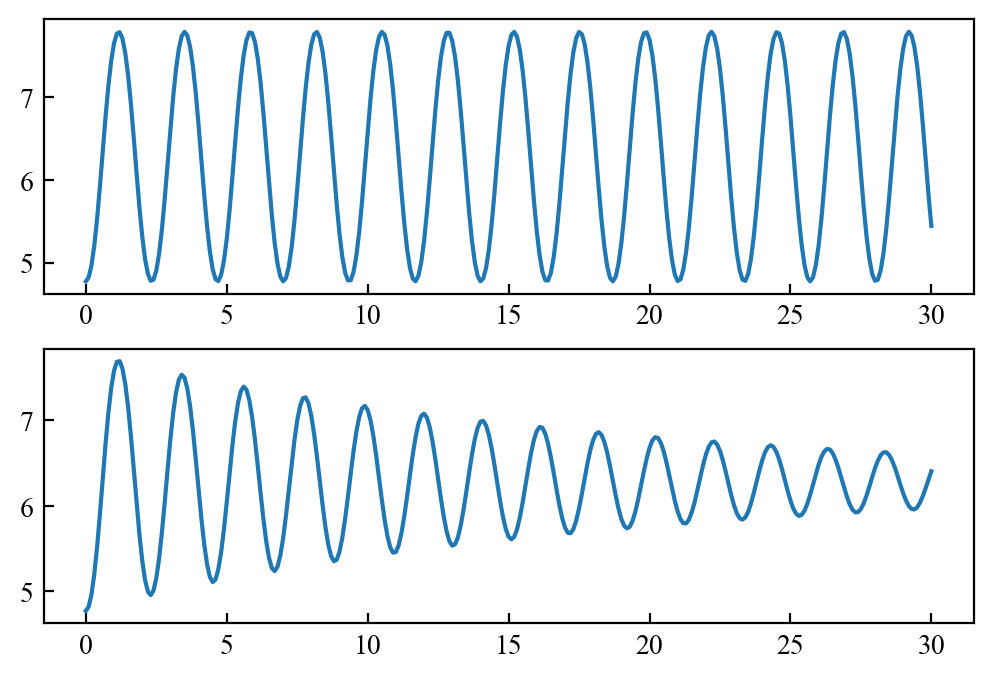

In [11]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(tt, thetas)
ax1 = fig.add_subplot(212)
ax1.plot(tt, thetas_with_resistance)
fig.show()

### 8
看不懂，过

### 9
贷款问题

In [12]:
Q = 60e4 - 20e4         # 贷款总额
r = 0.36/100    # 月利率
N = 30*12         # 总月数 (还款期限)
x = np.round((1+r)**N*Q*r / ((1+r)**N - 1), 2)
print("每月还款：", x)
print("总还款额：", x*N)

每月还款： 1984.19
总还款额： 714308.4


### 10
药物中毒问题

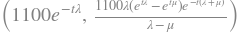

In [13]:
first_dosage = 1100

t = sp.symbols('t', nonneg=True)
x, y = sp.var('x, y', cls=sp.Function)      # x消化道药量，y血液中药量
_lambda, mu = sp.symbols('λ, μ', real=True)
eq1 = sp.Eq(x(t).diff(t), -_lambda*x(t))
ss1 = sp.dsolve(eq1, x(t), ics={x(0):first_dosage})
xt = ss1.rhs.simplify()
eq2 = sp.Eq(y(t).diff(t), _lambda*xt - mu*y(t))
ss2 = sp.dsolve(eq2, y(t), ics={y(0):0})
yt = ss2.rhs.simplify()
xt, yt

In [14]:
absord_halflife, eliminate_halflife = 5, 6
rp = {t: absord_halflife}
_lambda0 = sp.solve(xt.subs(rp) - first_dosage/2, _lambda)[0]
_lambda0

In [15]:
# 解 mu，考虑只排除不吸收的情况
a = sp.symbols('a')
ym = sp.Function('y_m')
eq = sp.Eq(ym(t).diff(t), -mu*ym(t))
ss = sp.dsolve(eq, ym(t), ics={ym(0):a})
ymt = ss.rhs
ymt

In [16]:
rp = {t: eliminate_halflife}
mu0 = list(sp.solveset(ymt.subs(rp) - a/2, mu, domain=sp.S.Reals).evalf())[0]
mu0

In [17]:
xt1 = xt.subs(_lambda, _lambda0)
xtf = sp.lambdify(t, xt1, 'numpy')
yt1 = yt.subs({_lambda:_lambda0, mu:mu0}).expand()
ytf = sp.lambdify(t, yt1, 'numpy')

tt = np.linspace(0, 25, 2500)
xx = xtf(tt)
yy = ytf(tt)

ymax = np.max(yy)
ind = np.argmax(yy)
tmax = tt[ind]


severe_dosage = 200
deadly_dosage = 400

from scipy.optimize import fsolve
ytf_severe = lambda t: ytf(t) - severe_dosage
severe_time = fsolve(ytf_severe, 2)[0]
ytf_deadly = lambda t: ytf(t) - deadly_dosage
deadly_time = fsolve(ytf_deadly, 5)[0]

yt2 = sp.dsolve(y(t).diff(t) - _lambda*xt + mu*y(t), ics={y(2):ytf(2)}).rhs
yt2 = yt2.subs({_lambda:_lambda0, mu:2*mu0})
tt2 = np.linspace(2, 25, 2300)
ytf2 = sp.lambdify(t, yt2, 'numpy')
yy2 = ytf2(tt2)

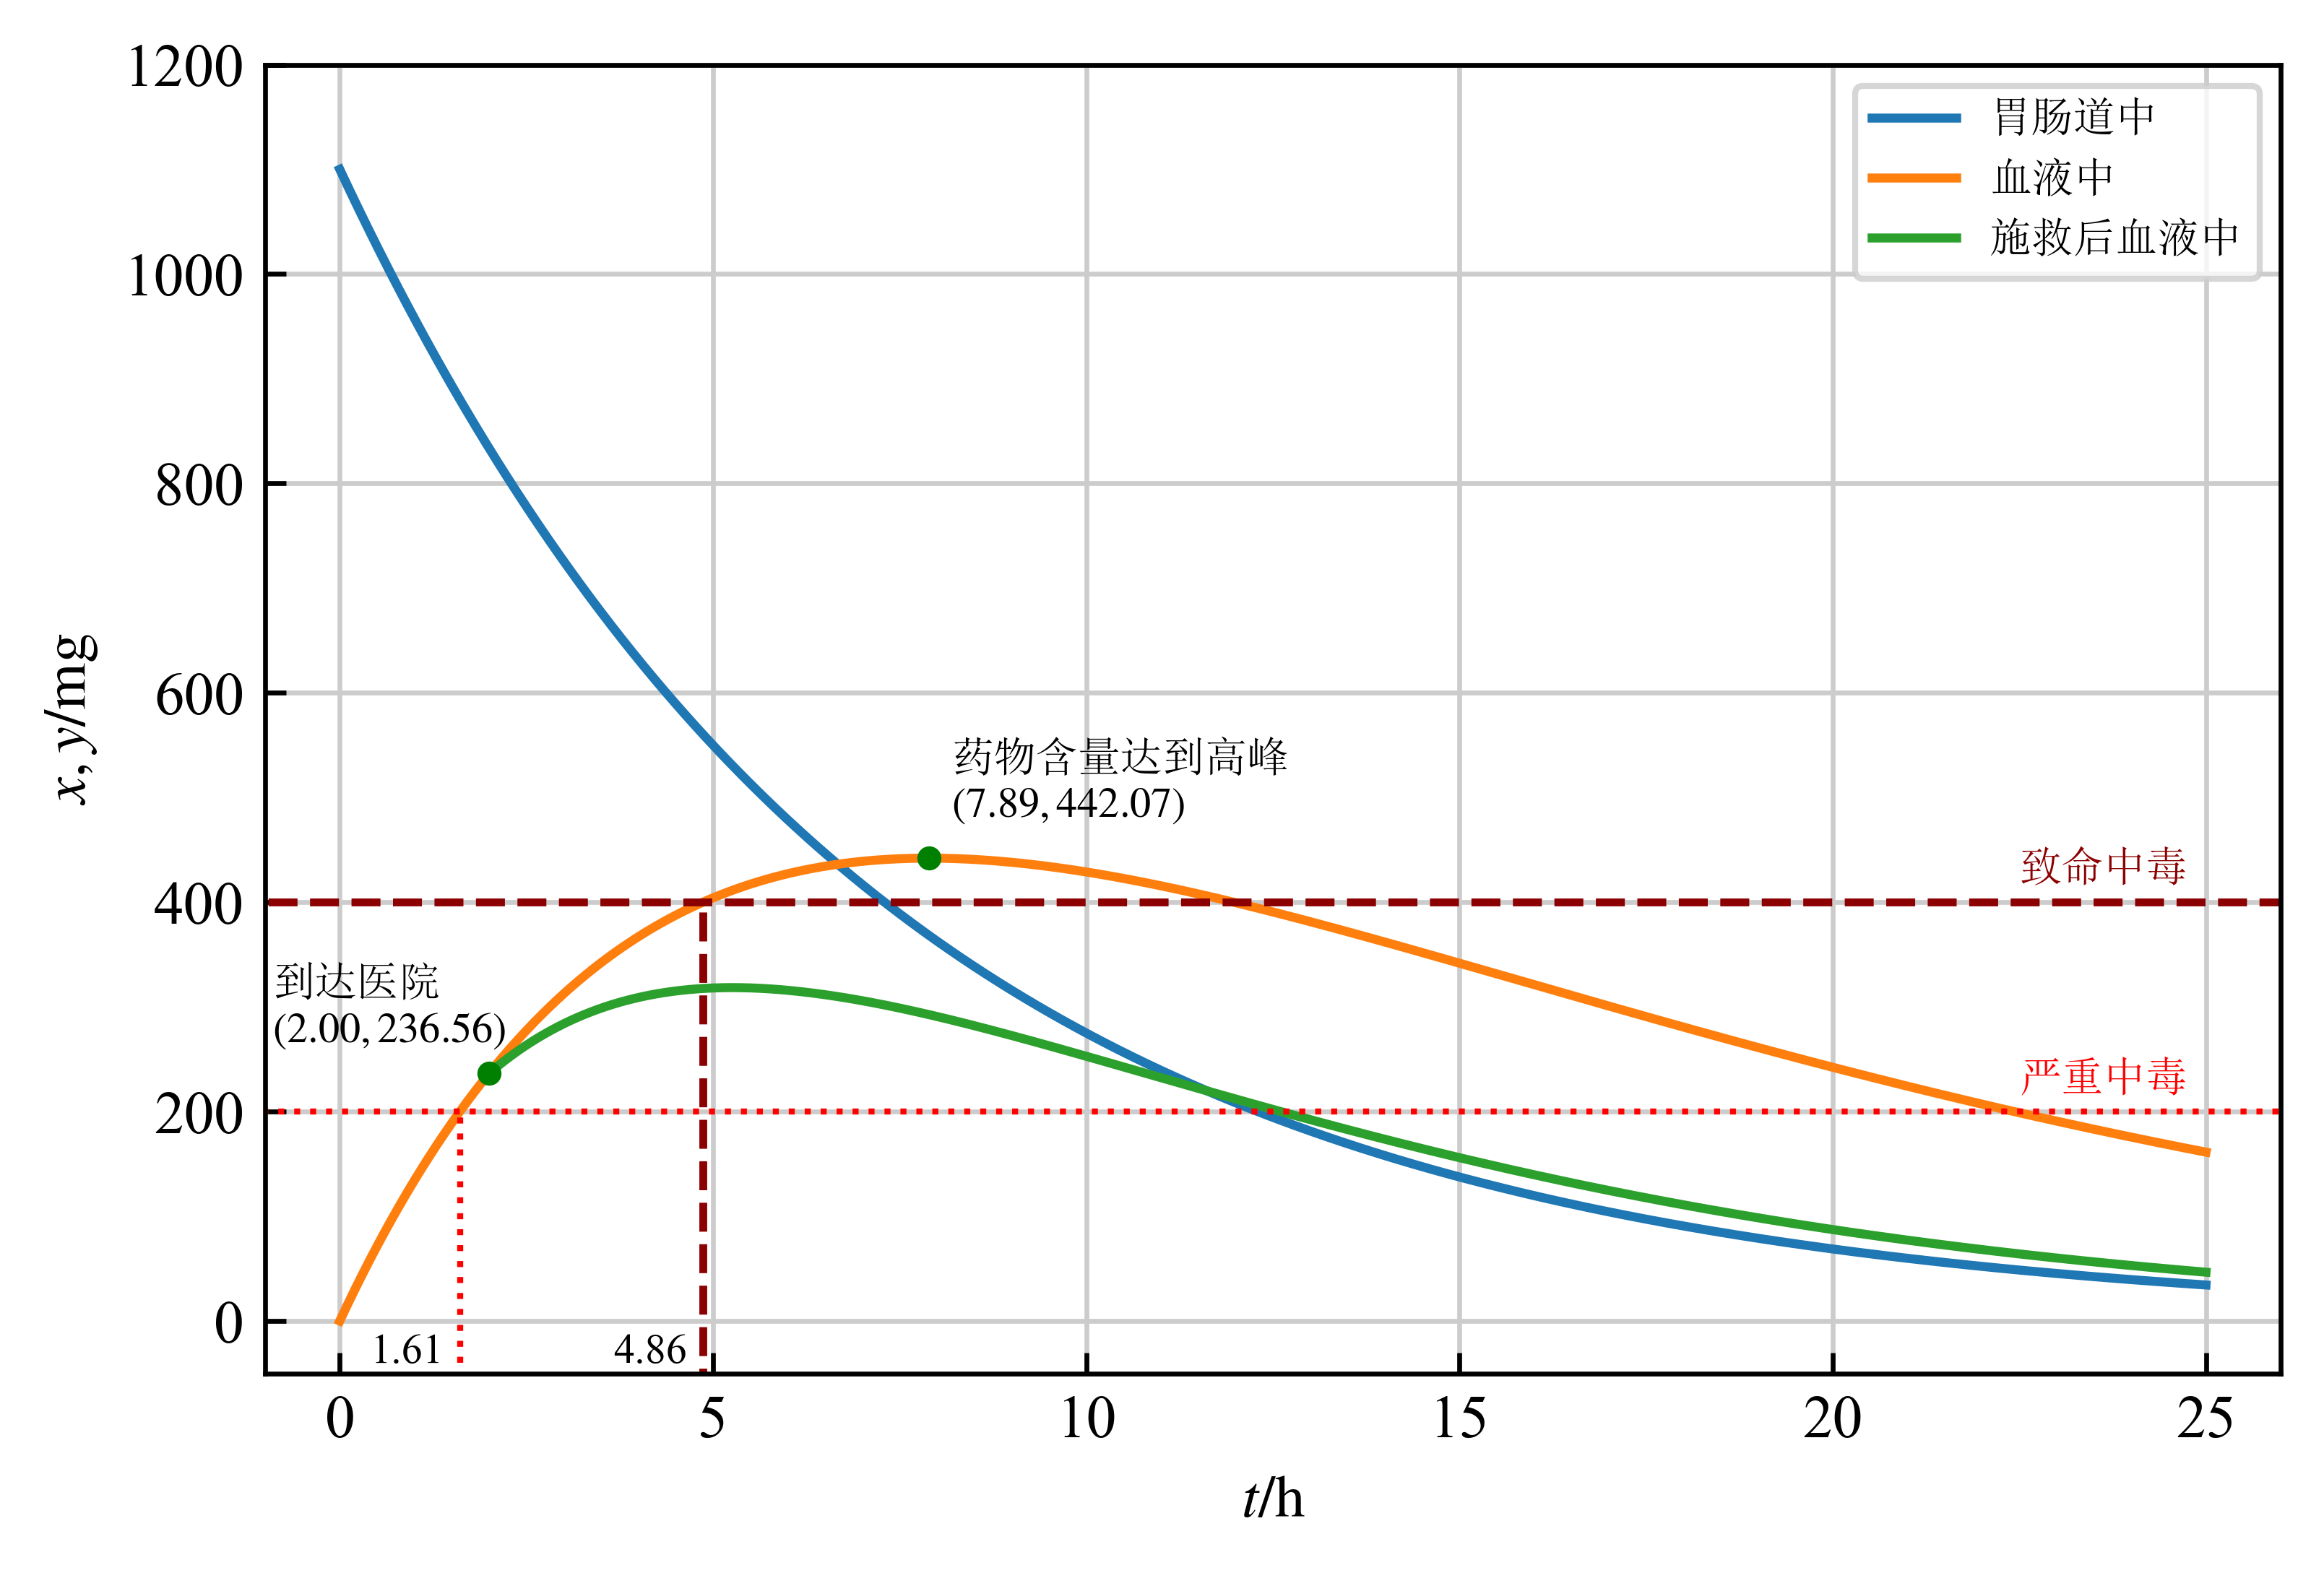

In [18]:
fig = plt.figure(dpi=600)
ax = fig.add_subplot(111)
ax.plot(tt, xx, label='胃肠道中')
ax.plot(tt, yy, label='血液中')
ax.plot(tt2, yy2, label='施救后血液中')

ax.plot([ax.get_xbound()[0], ax.get_xbound()[1]], [200, 200], ':r', linewidth=1)
ax.text(22.5, 220, '严重中毒', color='r', fontsize=7)
ax.plot([severe_time, severe_time], [ax.get_ybound()[0], severe_dosage], ':r', linewidth=1)
ax.text(severe_time-1.2, -40, f'{severe_time:.2f}', fontsize=7)
ax.plot([ax.get_xbound()[0], ax.get_xbound()[1]], [400, 400], '--', color='darkred', linewidth=1.3)
ax.text(22.5, 420, '致命中毒', color='darkred', fontsize=7)
ax.plot([deadly_time, deadly_time], [ax.get_ybound()[0], deadly_dosage], '--', color='darkred', linewidth=1.3)
ax.text(deadly_time-1.2, -40, f'{deadly_time:.2f}', fontsize=7)

ax.scatter(2, ytf(2), c='g', zorder=10, marker='.')
ax.text(-0.9, ytf(2)+30, f'到达医院\n$({2:.2f},{ytf(2):.2f})$', fontsize=7)
ax.scatter(tmax, ymax, c='g', zorder=10, marker='.')
ax.text(tmax+0.3, ymax+40, f'药物含量达到高峰\n$({tmax:.2f},{ymax:.2f})$', fontsize=7)

ax.set_xlabel(r'$t/{\rm h}$')
ax.set_ylabel(r'$x, y/{\rm mg}$')
ax.set_xbound(-1, 26)
ax.set_ybound(-50, 1200)
ax.legend(fontsize=7)
ax.grid(color='0.8')
fig.show()

### 11
差分方程建模，预测销售量

In [19]:
a, s = np.loadtxt('../../../hw/08第8章  常微分方程与差分方程习题解答/ti8_11.txt')
A = np.vstack([a[:-1], -a[:-1]*s[:-1], -s[:-1]]).T
b = np.diff(s)
u = np.linalg.pinv(A) @ b   # p, p/M, lambda
u

array([8.73347831e-01, 9.40669616e-05, 3.89838277e-01])

停掉广告，$p=0$

In [20]:
_lambda = u[-1]
sf = lambda s, t: -_lambda*s
print(odeint(sf, s[-1], range(7)))

[[4958.        ]
 [3357.39098008]
 [2273.51232844]
 [1539.5460959 ]
 [1042.5288466 ]
 [ 705.96547233]
 [ 478.05607409]]
